#Password Analysis

Great article: https://medium.com/policygenius-stories/the-sophisticates-guide-to-passwords-4bb6b5d9ecb5
        It states password length trumps complexity.  Short passwords already have hash lookups in rainbow tables.

Most common password length: 8 characters.  Special characters seldom used. Commonly used phrases: love, man, wang

In [45]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 10)
pd.set_option('display.width', 500)
pd.set_option('display.max_rows', 75)
pd.options.mode.chained_assignment = None     # default='warn'

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# make width of notebook track with width of browser window
from IPython.core.display import HTML
HTML("<style>.container{ width: 100% !important; }</style>")

In [2]:
%%time
# df = pd.read_table('http://datashaping.com/passwords.txt',skiprows=16,names=('A'),quoting=3)  # nrows=10
df = pd.read_csv('pwAnalysis.csv',usecols=['A'])
# df.A[df.A.str.len()>50] # should return nothing
# df.to_csv('pwAnalysis.csv')
# df.info()
print('rows = ',"{:,}".format(df.A.size),'\n','dups = ',df.A.size - df.A.unique().size)

rows =  2,151,220 
 dups =  399
Wall time: 1.98 s


In [81]:
#how many contain certain string
s = 'pass'
print('people use ',s,
      "{:%}".format(df[df['A'].str.lower().str.match(s,na=False)].size / df.size),' of the time')
df[df['A'].str.lower().str.match(s,na=False)].A.head(50).str.cat(sep='|')

people use  pass 0.084231%  of the time


'passme|pass6789|passw<>|passwort24|password@123|pass1990|password-1|passtoefl|passat37|passat12|passwordjoy?|pass2727|pass2431|pass66|passmedearbook|pass4pulse|Passat|password321|passwdCas|password301415|pass9033|passactuel|pass`123|passat10|passcode1013|password4632383|passorde|PASSMASS|passat81|password/|passmaniru|passat21|passwordancoramoltosemplice|pass=0|pass234|Passw0rd99|pass1970|password00|password82|pass321|pass14|Pass123.|passphrase|passwordla|Passion76|passpo10|passwords12|passed|passwordis|PASS123456789'

In [82]:
df5 = pd.DataFrame({'char':['love','pass','man','wang','dragon','zzzz','and','123']})
df5['occurence']= df5.char.apply(lambda ch: df[df.A.str.lower().str.match(ch.lower(),na=False)].size / df.size)
df5.sort_values(by='occurence',ascending=False)

,char,occurence
7,123,0.005526
3,wang,0.002387
0,love,0.002203
2,man,0.001684
6,and,0.001129
1,pass,0.000842
4,dragon,0.000301
5,zzzz,0.000052


most common length:  8.0 characters


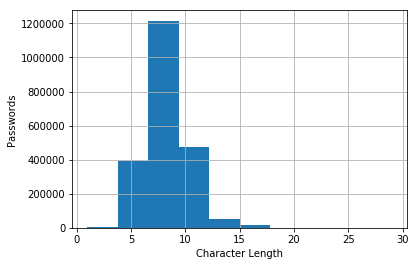

In [33]:
df['pwlength']=df.A.str.len()
pp = df['pwlength'].hist()
z = pp.set_xlabel("Character Length")
z = pp.set_ylabel("Passwords")
print('most common length: ',df['pwlength'].mode().max(), 'characters')

In [34]:
# how often are special case used?
df['specialChar']=df.A.apply(lambda s: not str(s).isalnum())
# df.A[df['specialChar']==True].head(50).str.cat(sep='|')  # print some passwords containing special characters
print('people use special characters ', "{:%}".format(df.A[df['specialChar']==True].size / df.A.size),'of the time')

people use special characters  3.104471% of the time


In [75]:
# what alpha character is most often used?
import nltk

def printMostCommon(n):
    df2 = pd.DataFrame(fdist.most_common(n))
    df2.columns = ['char','freq']
    df2['occurence']= df2.freq / len(df.A.str.cat()) 
#     print(df2)
    return df2
    
fdist = nltk.FreqDist(ch.lower() for ch in df.A.str.cat() if ch.isalpha())
printMostCommon(3)[['freq','occurence']]

,freq,occurence
0,1071085,0.059467
1,815992,0.045304
2,721275,0.040045


In [ ]:
#most common digits
fdist = nltk.FreqDist(ch.lower() for ch in df.A.str.cat() if ch.isdigit())
printMostCommon(3)
# df2.loc[:,['char','freq']

In [59]:
#most common special character
fdist = nltk.FreqDist(ch.lower() for ch in df.A.str.cat() if not ch.isalnum())
df2 = printMostCommon(8)
# print('special characters are used ',df2.freq.sum()/df.size,'of the time')


  char   freq  occurence
0    .  18397   0.001021
1    @  12159   0.000675
2    !  10708   0.000595
3    -   7715   0.000428
4    _   7627   0.000423
5    *   6432   0.000357
6    #   4684   0.000260
7        4173   0.000232


In [23]:
%%time
# %%time  #must be first in cell
# what character combo is most often used?

# import re
from collections import Counter

def mostCommonStrings(charLen):
    cnt = Counter()
    s=df.A.head(10000).str.cat()
#     s=df.A.str.cat()

    t = len(s) - (charLen - 1)
    for i in range(t):
        if not s[i:i+charLen].isdigit():
            cnt[s[i:i+charLen]] += 1
        df2 = pd.DataFrame(cnt.most_common(5))
        df2['chrLen'] = charLen
        # df2['chrLen']=df2.characters.apply(lambda str: len(str))
    print('charLen ',charLen,' returning')
    return df2[df2.iloc[:,1] > 4] #min threshold 4 occurences


df3 = pd.DataFrame()
for i in range(3,9):
    try:
        df3 = df3.append(mostCommonStrings(i),ignore_index=True)
    except:
        df3 = mostCommonStrings(i)

df3.columns = ['char','freq','chrLen']
print('records=',df3.index.size)

charLen  3  returning
charLen  4  returning
charLen  5  returning
charLen  6  returning
charLen  7  returning
charLen  8  returning
records= 30
Wall time: 46min 20s


In [29]:
df4 = df3.copy()
df4.sort_values('freq',ascending=False)

# df2.drop(df.index, inplace=True)
# df2 = df2.iloc[0:0].copy()

,char,freq,chrLen
0,ang,180,3
1,ing,131,3
2,ian,88,3
3,and,80,3
4,man,79,3
5,love,53,4
6,iang,36,4
7,n123,35,4
8,a123,28,4
9,wang,28,4
